### Student Name: Chelliah Kanthanathan
### Student ID: 18263003

### TASK 4 - Copy your linear classification algorithm to the notebook Etivity3_LinearRegression.ipynb available in the git repository. Change your linear classification algorithm to make it suitable for linear regression. Use this to obtain the best possible fit to the data set Task4.csv. 

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [29]:
df = pd.read_csv('./Task4.csv')

# Print the first five rows
df.head(5)

,X,y
0,0.0000,-0.3080
1,0.0101,-0.3470
2,0.0202,-0.0937
3,0.0303,-0.2860
4,0.0404,-0.0927


In [30]:
X = df['X'].values
print (X.shape)

(100,)


In [31]:
y = df['y'].values
print (y.shape)

(100,)


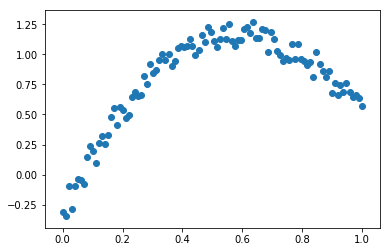

In [32]:
plt.scatter(X, y)

### Using In House Linear Regression

### Linear relationship can be defined as y = mX + b where as m = slope and b = intercept

#### As the data in Task4 CSV files is simple we can use ordinary least square method to find the slope and intercept

####  m = (X - X mean) * (y - y mean) / (X - X mean)^2

####  b = y mean - m * X mean

In [33]:
# Calculate the Mean
X_mean = np.mean(X)
y_mean = np.mean(y)

In [34]:
# Find the coefficients 
total_data_length = len(X)
deviation1 = 0
deviation2 = 0
for i in range (total_data_length):
    deviation1 += (X[i] - X_mean) * (y[i] - y_mean)
    deviation2 += (X[i] - X_mean) ** 2

coefficients_slope = deviation1 / deviation2
coefficients_intercept = y_mean - (coefficients_slope * X_mean)

print ("Slope:", coefficients_slope)
print ("Intercept:", coefficients_intercept)

Slope: 0.7894662979344387
Intercept: 0.3916747983642703


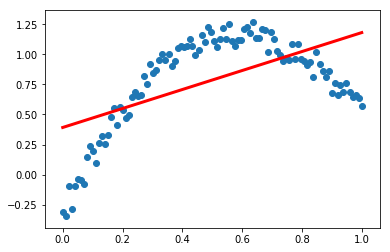

In [35]:
# Plot the data and best fit line
X_min = np.min(X)
X_max = np.max(X)
X_fit = np.linspace(X_min, X_max, 100)
y_fit = coefficients_slope*X_fit + coefficients_intercept

plt.scatter(X, y )
plt.plot(X_fit, y_fit,'r',linewidth=3)
plt.show()

In [36]:
mse = mean_squared_error(y, y_fit)
rmse = np.sqrt(mse)
print ("RMSE - In House Linear Regression:", rmse)

RMSE - In House Linear Regression: 0.3202850814151861


### Using Scikit Learn Linear Regression

In [37]:
model_linear_reg = LinearRegression()
X=X.reshape((total_data_length,1))
model_linear_reg.fit(X,y)
y_pred = model_linear_reg.predict(X)

print ("Slope:", model_linear_reg.coef_)
print ("Intercept:", model_linear_reg.intercept_)

Slope: [0.7894663]
Intercept: 0.3916747983642704


In [38]:
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print ("RMSE - Scikit Learn Linear Regression:", rmse)

RMSE - Scikit Learn Linear Regression: 0.32027888915749275


### The RMSE error for both the In House Linear Regression and Scikit leanr Linear Regression is almost same

### The best fit regression line (in RED) above does not fit all the data. It could be improved by transforming the data and adding new features

### Transform Data and add new feartures to improve the performance

In [50]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5, include_bias=False)
X_transformed = poly.fit_transform(X)
y=y.reshape((total_data_length,1))
y_transformed = poly.fit_transform(y)
print (X_transformed.shape)
print (y_transformed.shape)

(100, 5)
(100, 5)


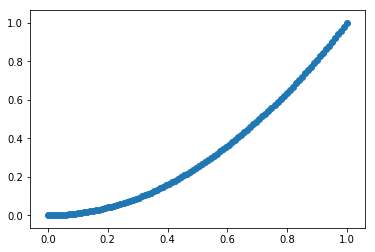

In [51]:
plt.scatter(X_transformed[:,0], X_transformed[:,1])

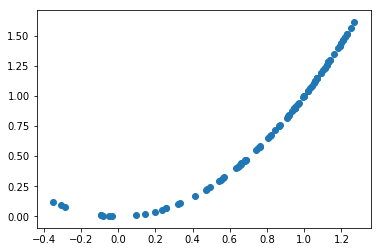

In [52]:
plt.scatter(y_transformed[:,0], y_transformed[:,1])

In [53]:
# Calculate the Mean
X_mean = np.mean(X_transformed)
y_mean = np.mean(y_transformed)

In [54]:
# Find the coefficients 
total_data_length = len(X_transformed)
deviation1 = 0
deviation2 = 0
for i in range (total_data_length):
    deviation1 += (X_transformed[i] - X_mean) * (y_transformed[i] - y_mean)
    deviation2 += (X_transformed[i] - X_mean) ** 2

coefficients_slope = deviation1 / deviation2
coefficients_intercept = y_mean - (coefficients_slope * X_mean)

print ("Slope:", coefficients_slope)
print ("Intercept:", coefficients_intercept)

Slope: [ 0.48490882  0.36606068  0.07109379 -0.29637439 -0.6741176 ]
Intercept: [0.66849905 0.70321614 0.78937978 0.896722   1.00706568]


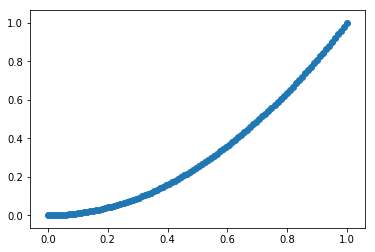

In [55]:
# Plot the data and best fit line
X_min = np.min(X_transformed)
X_max = np.max(X_transformed)
X_fit = np.linspace(X_min, X_max, 100)
y_fit = ((coefficients_slope[0]*X_fit) + (coefficients_slope[1]*X_fit)) + (coefficients_intercept[0]+coefficients_intercept[1])

plt.scatter(X_transformed[:,0], X_transformed[:,1])
plt.show()

### Using polynomial transformation attempted to transform the data to find the best fit line. With above transformation the original data transformed in a way that helps to find the best fit line